In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys, copy, emcee, corner

%matplotlib inline
%load_ext autoreload

sys.path.append('./ligbind/')
import ligbind as lb

In [3]:
WT_08_lbl, WT_08_rtot, WT_08_lig, WT_08_sat = lb.datprep('Data/EGFR_WT_08_Sat.csv','Data/EGFR_WT_08_Rtot.csv')
WT_09_lbl, WT_09_rtot, WT_09_lig, WT_09_sat = lb.datprep('Data/EGFR_WT_09_Sat.csv','Data/EGFR_WT_09_Rtot.csv')
WT_11_lbl, WT_11_rtot, WT_11_lig, WT_11_sat = lb.datprep('Data/EGFR_WT_11_Sat.csv','Data/EGFR_WT_11_Rtot.csv')

hootie hoo! the indices match!
hootie hoo! the indices match!
hootie hoo! the indices match!


In [4]:
def rtot_objfun(guess,parm,lig,dat):
    datac = np.concatenate(dat)
    calc = lb.models.wymfunc(parm,lig,guess)
    
    return (calc-datac)
    

In [5]:
guess = np.array([0.001,0.003,0.005,0.01,0.02,0.03])

In [22]:
parm_set1 = np.array([4.6,5.3,0.34,530.])

In [25]:
rtot_objfun(guess,parm_set1,WT_08_lig,WT_08_sat)

array([-0.0164731 , -0.01895512, -0.00647369, -0.00612299,  0.01836136,
       -0.00126613,  0.02603005,  0.07466845, -0.01253466, -0.028678  ,
        0.00590562,  0.00553225,  0.03186777,  0.01713015, -0.01526264,
       -0.0022922 , -0.00641707,  0.00243886,  0.00644122,  0.01103878,
       -0.01484492, -0.0207233 , -0.03069195, -0.00204195,  0.01633407,
       -0.01352036,  0.00581783, -0.01328738, -0.01068824,  0.01964022,
        0.03023312,  0.00553165, -0.01489492, -0.00225757,  0.0014237 ,
       -0.04222487, -0.03772394, -0.04308389,  0.00134986, -0.02185199,
       -0.00199387, -0.01193571,  0.00547358,  0.00751177, -0.01913387,
       -0.03247373, -0.04477795, -0.08669428, -0.06406837, -0.0833117 ,
       -0.01738786, -0.03897044, -0.02901607,  0.01722956, -0.01416308,
       -0.00240049,  0.01300474, -0.0168107 , -0.01791408, -0.00374973,
       -0.01035836, -0.03640324, -0.01008158, -0.00174584, -0.04702937,
       -0.01063256, -0.01438064, -0.00430402, -0.01462584, -0.00

In [8]:
lsbnds = (tuple(1e-5 for i in range(6)),tuple(1e-1 for i in range(6)))

In [26]:
a = sp.optimize.least_squares(rtot_objfun,guess,args=(parm_set1,WT_08_lig,WT_08_sat),bounds=lsbnds)

In [27]:
a.x

array([ 0.00143878,  0.00242228,  0.00339179,  0.0027181 ,  0.01216361,
        0.02594478])

In [11]:
WT_08_rtot

array([ 0.001439,  0.002422,  0.003392,  0.002718,  0.01216 ,  0.02594 ])

In [12]:
WT_09_lig.shape

(5,)

In [13]:
WT_11_rtot.shape

(6,)

In [14]:
a = sp.optimize.least_squares(rtot_objfun,guess,args=(parms,WT_11_lig,WT_11_sat),bounds=lsbnds)

In [15]:
a.x

array([ 0.00330977,  0.00679375,  0.01122675,  0.09999999,  0.1       ,
        0.1       ])

In [74]:
WT_08_parm = np.array([4.6,5.3,0.34,530.])
WT_09_parm = np.array([4.2,2.0,0.19,860.])
WT_11_parm = np.array([3.4,1.1,0.15,240.])

KI_08_parm = np.array([0.36,48.,0.79,0.61])
KI_09_parm = np.array([0.17,61.,1.9,1.0])
KI_09c_parm = np.array([0.15,75.,0.56,3.7])

In [17]:
a = sp.optimize.least_squares(rtot_objfun,guess,args=(WT_08_parm,WT_08_lig,WT_08_sat),bounds=lsbnds)

In [18]:
a.x

array([ 0.00143878,  0.00242228,  0.00339179,  0.0027181 ,  0.01216361,
        0.02594478])

In [19]:
WT_08_rtot

array([ 0.001439,  0.002422,  0.003392,  0.002718,  0.01216 ,  0.02594 ])

In [20]:
KI_08_lbl, KI_08_rtot, KI_08_lig, KI_08_sat = lb.datprep('Data/EGFR_KI_08_Sat.csv','Data/EGFR_KI_08_Rtot.csv')
KI_09_lbl, KI_09_rtot, KI_09_lig, KI_09_sat = lb.datprep('Data/EGFR_KI_09_Sat.csv','Data/EGFR_KI_09_Rtot.csv')
KI_09c_lbl, KI_09c_rtot, KI_09c_lig, KI_09c_sat = lb.datprep('Data/EGFR_KI_09c_Sat.csv','Data/EGFR_KI_09c_Rtot.csv')

hootie hoo! the indices match!
hootie hoo! the indices match!
hootie hoo! the indices match!


In [38]:
sats = [WT_08_sat,WT_09_sat,WT_11_sat,KI_08_sat,KI_09_sat,KI_09c_sat]
ligs = [WT_08_lig,WT_09_lig,WT_11_lig,KI_08_lig,KI_09_lig,KI_09c_lig]
parms = [WT_08_parm,WT_09_parm,WT_11_parm,KI_08_parm,KI_09_parm,KI_09c_parm]
rtots = [WT_08_rtot,WT_09_rtot,WT_11_rtot,KI_08_rtot,KI_09_rtot,KI_09c_rtot]
guesses = [guess,guess[:-1],guess,guess,guess,guess]

In [40]:
for i in guesses:
    print(i.shape)

(6,)
(5,)
(6,)
(6,)
(6,)
(6,)


In [34]:
lsbnds

((1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05), (0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

In [41]:
[sp.optimize.least_squares(rtot_objfun,guesses[i],args=(parms[i],ligs[i],sats[i]),bounds=lsbnds[i]).x for i in range(len(sats))]

ValueError: Inconsistent shapes between bounds and `x0`.

In [36]:
parms[1]

array([  4.20000000e+00,   2.00000000e+00,   1.90000000e-01,
         8.60000000e+02])

In [44]:
lsbnds

((1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05), (0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

In [90]:
(lsbnds[0][:-1],lsbnds[1][:-1])

((1e-05, 1e-05, 1e-05, 1e-05, 1e-05), (0.1, 0.1, 0.1, 0.1, 0.1))

In [45]:
lsbnds5 = ((1e-05, 1e-05, 1e-05, 1e-05, 1e-05), (0.1, 0.1, 0.1, 0.1, 0.1))

In [46]:
lsbnds6 = ((1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05), (0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

In [75]:
sats = [WT_08_sat,WT_09_sat,WT_11_sat,KI_08_sat,KI_09_sat,KI_09c_sat]
ligs = [WT_08_lig,WT_09_lig,WT_11_lig,KI_08_lig,KI_09_lig,KI_09c_lig]
parms = [WT_08_parm,WT_09_parm,WT_11_parm,KI_08_parm,KI_09_parm,KI_09c_parm]
rtots = [WT_08_rtot,WT_09_rtot,WT_11_rtot,KI_08_rtot,KI_09_rtot,KI_09c_rtot]
guesses = [guess,guess[:-1],guess,guess,guess,guess]
bounds = [lsbnds6,lsbnds5,lsbnds6,lsbnds6,lsbnds6,lsbnds6]

In [76]:
a = [sp.optimize.least_squares(rtot_objfun,guesses[i],args=(parms[i],ligs[i],sats[i]),bounds=bounds[i],ftol=1e-14).x for i in range(len(sats))]

In [51]:
lsbnds

((1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05), (0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

In [52]:
lsbnds6

((1e-05, 1e-05, 1e-05, 1e-05, 1e-05, 1e-05), (0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

In [53]:
lsbnds5

((1e-05, 1e-05, 1e-05, 1e-05, 1e-05), (0.1, 0.1, 0.1, 0.1, 0.1))

In [77]:
a

[array([ 0.00143878,  0.00242228,  0.00339179,  0.0027181 ,  0.01216361,
         0.02594478]),
 array([ 0.00058892,  0.00254376,  0.00642976,  0.01263456,  0.05509229]),
 array([ 0.0011934 ,  0.00351278,  0.00608287,  0.01967875,  0.03012646,
         0.09250149]),
 array([ 0.00119181,  0.00302457,  0.00653417,  0.00631584,  0.01723065,
         0.02554929]),
 array([ 0.0005009 ,  0.00159331,  0.00328982,  0.00478844,  0.0154645 ,
         0.01698975]),
 array([ 0.0003901 ,  0.00122332,  0.00239967,  0.00279824,  0.00689825,
         0.01002052])]

[ 0.001439  0.002422  0.003392  0.002718  0.01216   0.02594 ]
[ 0.0005889  0.002544   0.00643    0.01263    0.05509  ]
[ 0.001193  0.003513  0.006083  0.01968   0.03013   0.0925  ]
[ 0.001192  0.003025  0.006534  0.006316  0.01723   0.02555 ]
[ 0.0005009  0.001593   0.00329    0.004788   0.01546    0.01699  ]
[ 0.0003901  0.001223   0.0024     0.002798   0.006898   0.01002  ]


In [79]:
for i in parms:
    print(i)

[  4.60000000e+00   5.30000000e+00   3.40000000e-01   5.30000000e+02]
[  4.20000000e+00   2.00000000e+00   1.90000000e-01   8.60000000e+02]
[  3.40000000e+00   1.10000000e+00   1.50000000e-01   2.40000000e+02]
[  0.36  48.     0.79   0.61]
[  0.17  61.     1.9    1.  ]
[  0.15  75.     0.56   3.7 ]


In [80]:
np.array(a) - np.array(rtots)

array([ array([ -2.24325992e-07,   2.75357359e-07,  -2.07987439e-07,
         1.03305348e-07,   3.60706337e-06,   4.78415024e-06]),
       array([  1.79743241e-08,  -2.38545978e-07,  -2.36658803e-07,
         4.55955724e-06,   2.28666452e-06]),
       array([  4.03737609e-07,  -2.16147616e-07,  -1.31443791e-07,
        -1.25037051e-06,  -3.54108417e-06,   1.48836808e-06]),
       array([ -1.86949770e-07,  -4.27952029e-07,   1.66436653e-07,
        -1.64069912e-07,   6.52384501e-07,  -7.07859732e-07]),
       array([ -1.10957483e-09,   3.07645625e-07,  -1.76233117e-07,
         4.37679281e-07,   4.49626022e-06,  -2.49850515e-07]),
       array([ -3.16559882e-09,   3.20107881e-07,  -3.28587191e-07,
         2.37769315e-07,   2.45118119e-07,   5.17540480e-07])], dtype=object)

In [81]:
res = sp.optimize.least_squares(rtot_objfun,KI_09_rtot,args=(KI_09_parm,KI_09_lig,KI_09_sat),bounds=lsbnds)

In [82]:
res.x

array([ 0.0005009 ,  0.00159331,  0.00328982,  0.00478844,  0.0154645 ,
        0.01698975])

In [83]:
KI_09_rtot

array([ 0.0005009,  0.001593 ,  0.00329  ,  0.004788 ,  0.01546  ,  0.01699  ])

In [84]:
WT_09_rtot

array([ 0.0005889,  0.002544 ,  0.00643  ,  0.01263  ,  0.05509  ])

In [85]:
KI_09_lbl

['22k', '57k', '103k', '150k', '361k', '485k']

In [86]:
WT_09_lbl

['20k', '46k', '187k', '256k', '1200k']

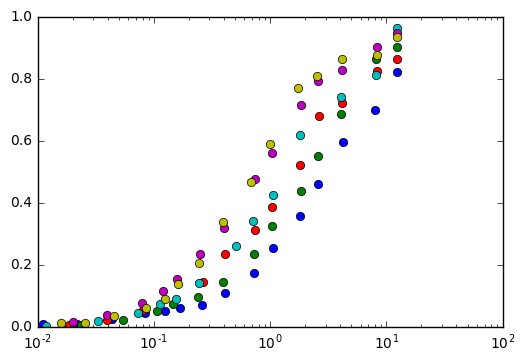

In [87]:
lb.semlog(KI_09_lig,KI_09_sat,'o')

In [88]:
parms

[array([  4.60000000e+00,   5.30000000e+00,   3.40000000e-01,
          5.30000000e+02]),
 array([  4.20000000e+00,   2.00000000e+00,   1.90000000e-01,
          8.60000000e+02]),
 array([  3.40000000e+00,   1.10000000e+00,   1.50000000e-01,
          2.40000000e+02]),
 array([  0.36,  48.  ,   0.79,   0.61]),
 array([  0.17,  61.  ,   1.9 ,   1.  ]),
 array([  0.15,  75.  ,   0.56,   3.7 ])]